In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jioprepaidplans/Jio - Jio Prepaid Planes.csv


# Data Analysis and Visualization Notebook

> This dataset covers various plans that Reliance Jio Prepaid offers to its customers. Based upon that the dataset has following columns.

> Days - Includes number of days a plan offers

> Price - Includes price for the offered day

> Price/Day - How much price does customer conquer in a day

> For 365 Days - Price for 365 days

> Profit per customer - How much profit does jio makes per customer

> From 400 Million users - Profit from 400M users

> Data_per_day - Amount of data they provide to user per day according to the plan.

# Reading Data

In [2]:
df = pd.read_csv('/kaggle/input/jioprepaidplans/Jio - Jio Prepaid Planes.csv')
df.head()

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day
0,28,209,7.464286,2724.464286,5.214286,2085.714286,1.0
1,24,179,7.458333,2722.291667,3.041667,1216.666667,1.0
2,20,149,7.450000,2719.250000,0.000000,0.000000,1.0
3,336,2545,7.574405,2764.657738,0.000000,0.000000,1.5
4,84,666,7.928571,2893.928571,129.270833,51708.333330,1.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Days                    16 non-null     int64  
 1   Price                   16 non-null     int64  
 2   Price/Day               16 non-null     float64
 3   For 365 Days            16 non-null     float64
 4   Profit per customer     16 non-null     float64
 5   From 400 Million users  16 non-null     float64
 6   Data_per_day            16 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.0 KB


In [4]:
df.describe()

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,76.687500,663.812500,9.306167,3396.750914,306.361219,122544.487586,1.718750
std,109.140716,845.097645,2.320658,847.040309,345.420462,138168.184724,0.604669
min,14.000000,119.000000,7.450000,2719.250000,0.000000,0.000000,1.000000
25%,23.750000,206.500000,7.809355,2850.414434,2.281250,912.500000,1.500000
50%,28.000000,279.000000,8.544643,3118.794643,294.933036,117973.214300,1.500000
75%,63.000000,566.250000,9.808036,3579.933035,388.228132,155291.252575,2.000000
max,365.000000,2879.000000,14.964286,5461.964286,1072.521739,429008.695700,3.000000


In [5]:
df.columns

Index(['Days', 'Price', 'Price/Day', 'For 365 Days', 'Profit per customer',
       'From 400 Million users', 'Data_per_day'],
      dtype='object')

# Let's explore dataset

In [6]:
#Max profit per customer

max_prof = df['Profit per customer'].max()
print(max_prof)
max_profit_plan = df.loc[df['Profit per customer'] == max_prof, 'Days'].iloc[0]

print('Plan with max profit is {} days plan'.format(max_profit_plan))


1072.521739
Plan with max profit is 23 days plan


In [7]:
#Let's check if its true for 400million customers

max_prof_400M = df['From 400 Million users'].max()
print(max_prof_400M)
max_profit_plan = df.loc[df['From 400 Million users'] == max_prof_400M, 'Days'].iloc[0]

print('Plan with max profit wrt 400M users is {} days plan'.format(max_profit_plan))


429008.6957
Plan with max profit wrt 400M users is 23 days plan


In [8]:
#Total money from 400 Million Users in a year
total = df['From 400 Million users'].sum()
total

1960711.8013829999

In [9]:
#Find cheapest plan using price per day

#min price per day
Least_price = df['Price/Day'].min()
print('min price per day', Least_price)

#Cheapest plan
Cheapest_plan = df.loc[df['Price/Day'] == Least_price, 'Days'].iloc[0]
print('Cheapest Plan per day', Cheapest_plan)

#Profit from Cheapest plan
Profit_min = df.loc[df['Days'] == Cheapest_plan, 'Profit per customer'].iloc[0]
print('Profit Jio makes at its cheapest plan ', Profit_min)

min price per day 7.45
Cheapest Plan per day 20
Profit Jio makes at its cheapest plan  0.0


Means 20 day plan is the cheapest plan which costs just Rs 7.45 per day to the customer has zero profits for the company

In [10]:
#Let's check how much would people be paying if they go for max days plan (365 days)

#Find the max tennure plan
max_tennure = df['Days'].max()
print('Max Tennure plan', max_tennure)

#what price do people pay and what do they get
price_max = df.loc[df['Days'] == max_tennure, 'For 365 Days'].iloc[0]
print('Price for 365 days plan', price_max)

Max Tennure plan 365
Price for 365 days plan 2879.0


In [11]:
#Let's see how much profit Jio makes per customer around 365 day plan

Profit_max = (df.loc[df['For 365 Days'] == price_max, 'From 400 Million users']).iloc[0]
print('Profit from 365 days plan', Profit_max)

Profit from 365 days plan 0.0


This shows that the max 

In [12]:
#Check for Max data 

max_dataplan = df['Data_per_day'].max()
print('Max data plan {} GB'.format(max_dataplan))

Max data plan 3.0 GB


In [13]:
#Let's check for min data plan
min_dataplan = df['Data_per_day'].min()
print('Min data plan {} GB'.format(min_dataplan))

Min data plan 1.0 GB


# Visual Analysis

In [14]:
import matplotlib.pyplot as plt


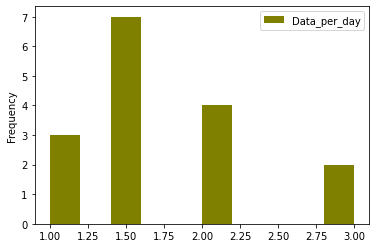

In [15]:
# Let's check which data plan has max users

df.Data_per_day.plot(kind = 'hist', color = 'olive')
plt.legend()

From above histogram we can infer that 1.50 Gb data plan is the most popular one.

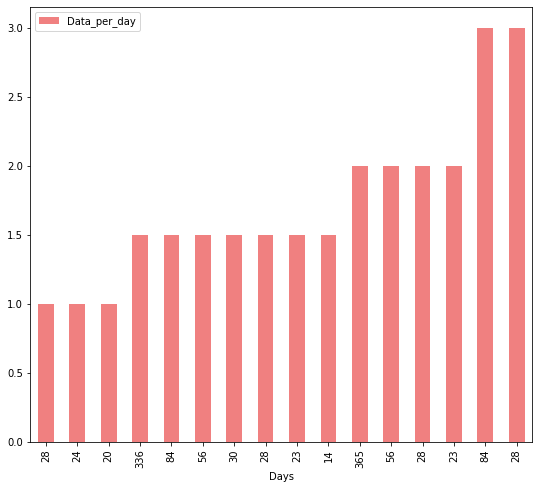

In [16]:
#Plot for how much data user gets for each plan

df.plot(x="Days", y="Data_per_day", kind="bar", figsize=(9, 8), color = 'lightcoral')
plt.show()

There are 4 entries for 28 days plan, 2 entries for 56 and 84 days plan, i.e these 3 plans come with options of different data plans.


<AxesSubplot:ylabel='Profit per customer'>

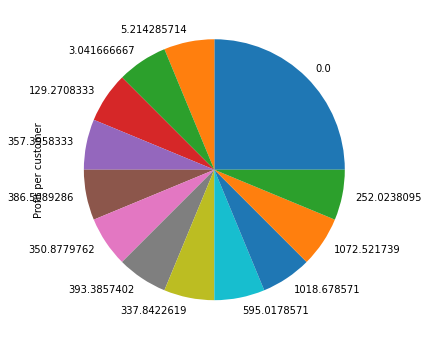

In [17]:
#Plot for profit per customer

df['Profit per customer'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))

About 1/4th part of total plot is 0.0.

<AxesSubplot:xlabel='Days', ylabel='Profit per customer'>

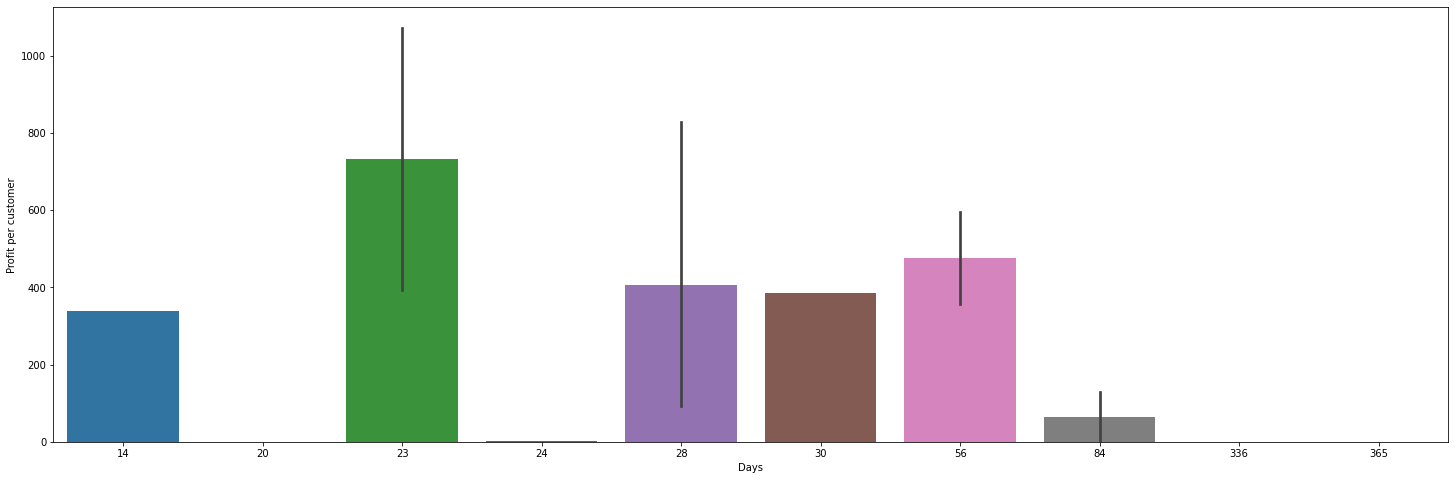

In [18]:
#How many days plan yields max profit per user
import seaborn as sns
plt.figure(figsize = (25,8))
sns.barplot(x = 'Days', y = 'Profit per customer', data = df)

Above barplot suggests that 23 days plan yields max profit per customer

**Thank You :)**

Please share your feedback and suggestions.